In [39]:
import robot_plotter as rp
import models_functions as mf
import traj
import numpy as np
import matplotlib.pyplot as plt
import robot_sim as sim
import sim_helper_funcs as hfunc
import save_load_data as sldat

In [40]:
# Now, load the data
dt=0.01
robData = sldat.load_object('para')

# get number of robots
robot_N = robData.ids.shape[0]

colors = ['blue', 'red', 'green']

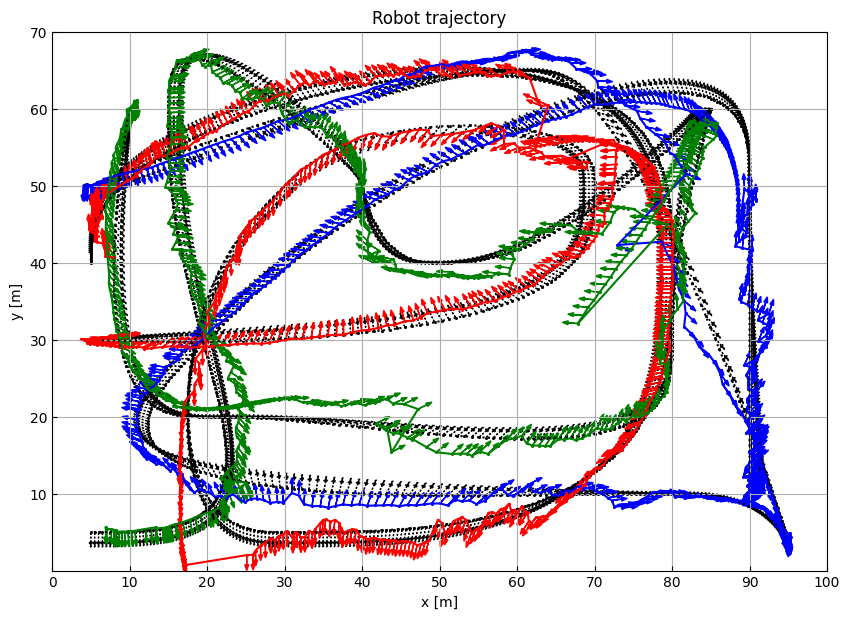

In [41]:
# And plot:
s_idx = 0

fig, ax = rp.setup_plot()
# Plot ground truth
for i in range(robot_N):
    rp.plot_position(ax, robData.pos[i,:,::100], color='black', marker=None, linestyle=':', label='Robot 1 reference') # fix label

# Plot states of robots:
for i in range(robot_N):
    rp.plot_position2(ax, robData.x_log[i,:,::100,s_idx], None, color=colors[i], marker=None, label='Robot 1 trajectory')
    # P_log3[:,:,::100,s_idx]


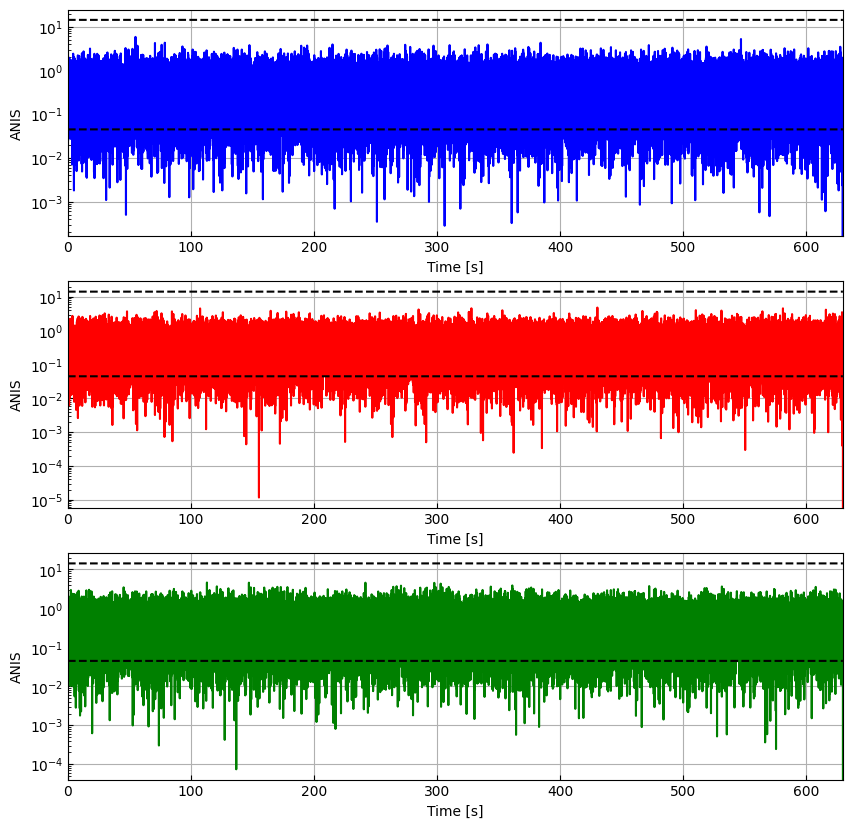

In [42]:
# ANIS analysis
fig, axnis = plt.subplots(robot_N, figsize=(10,10))
# Three df
for i in range(robot_N):
    rp.plot_ANIS(ax=axnis[i], nis=robData.IMU_nis_log[i] , df=3, dt=dt, prob=0.995, color=colors[i])

Text(0.5, 1.0, 'Robot 3')

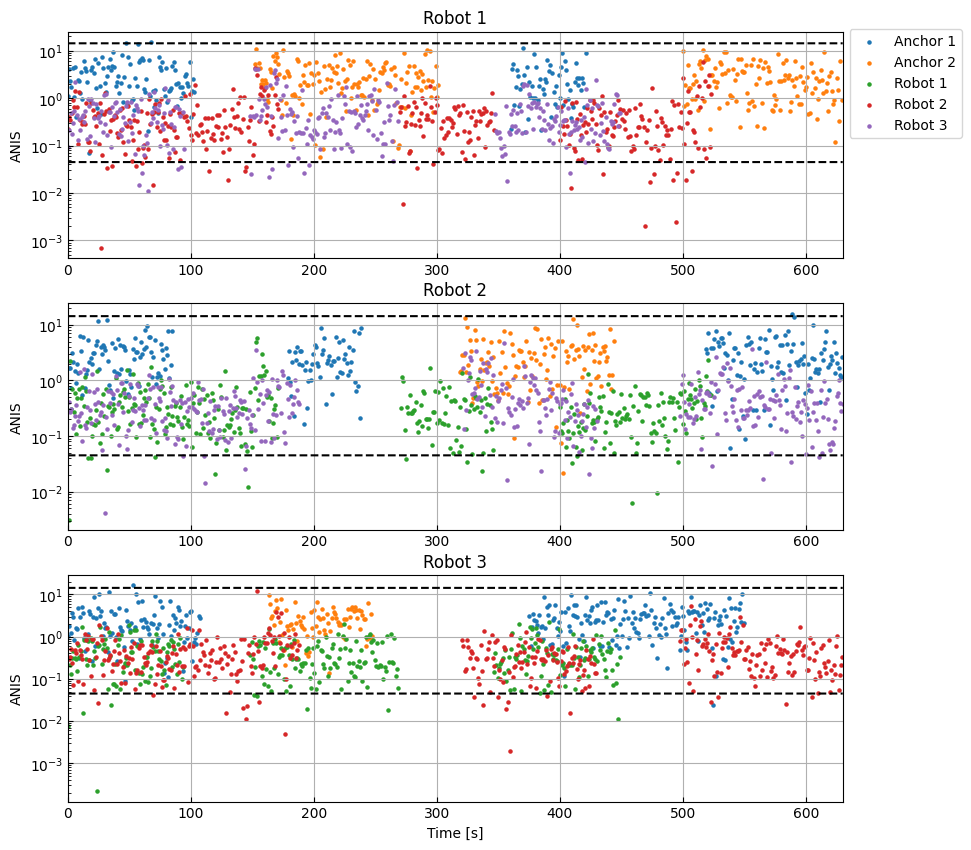

In [43]:
# ANIS analysis
fig, axnis = plt.subplots(robot_N, figsize=(10,10))
# Three df
df = 3
for i in range(robot_N):
    rp.plot_ANIS_rb(ax=axnis[i], 
                nis=robData.RB_nis_log[i], 
                rb_ids=robData.rb_ids[i], 
                pos_ids=[1, 2, 111, 222, 333], 
                labels=['Anchor 1', 'Anchor 2', 'Robot 1', 'Robot 2', 'Robot 3'],
                df=df, 
                dt=dt, 
                prob=0.995)

axnis[0].legend(loc='lower left', bbox_to_anchor=(1, 0.5))
axnis[0].set_xlabel(None)
axnis[1].set_xlabel(None)
axnis[0].set_title('Robot 1')
axnis[1].set_title('Robot 2')
axnis[2].set_title('Robot 3')

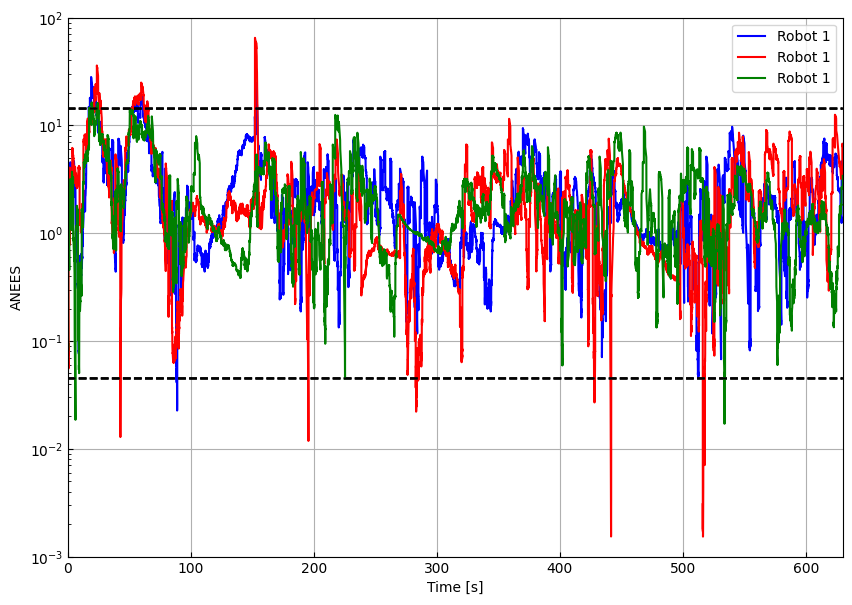

In [44]:
# Plot metrics:
# ANEES analysis
# If higher than confidence interval, then the estimate is overconfident
fig, ax_anees = plt.subplots(1, figsize=(10,7))
anees_sel = np.array([[True],[False],[False]])
pos_ind = [0, 2, 3]
#anees_sel = np.array([[False],[False]])
#pos_ind = [2, 3]
for i in range(robot_N):
    rp.plot_ANEES(ax_anees, 
             x_est=robData.x_log[i, pos_ind,:],
             x_true=robData.pos[i,:3,:], 
             P = robData.P_log[i][pos_ind][:, pos_ind, :, :],
             rad_sel=anees_sel,
             dt=dt,
             prob=0.995,
             color=colors[i],
             label='Robot 1')

ax_anees.set_ylim([0.001, 100])

ax_anees.legend()